In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
from datasets import load_dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

c:\Users\karan\miniconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df.job_posted_date

0        2023-06-16 13:44:15
1        2023-01-14 13:18:07
2        2023-10-10 13:14:55
3        2023-07-04 13:01:41
4        2023-08-07 14:29:36
                 ...        
785736   2023-03-13 06:16:16
785737   2023-03-12 06:18:18
785738   2023-03-12 06:32:36
785739   2023-03-12 06:32:15
785740   2023-03-13 06:16:31
Name: job_posted_date, Length: 785741, dtype: datetime64[ns]

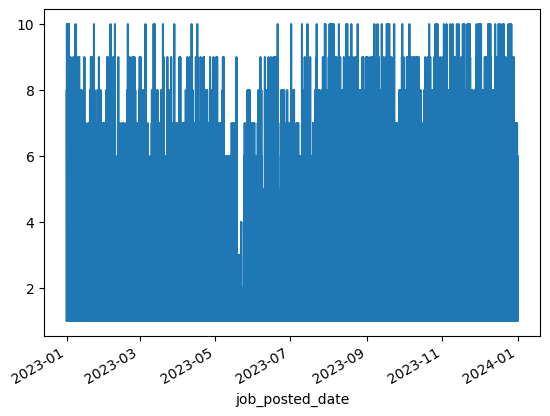

In [5]:
df.job_posted_date.value_counts().sort_index().plot()
plt.show()


In [9]:
median_yearly_avg = df['salary_year_avg'].median()

In [10]:
median_hourly_avg = df['salary_hour_avg'].median()

In [11]:
df_filled = df

In [12]:
df_filled

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,None,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"['bash', 'python', 'perl', 'linux', 'unix', 'k...","{'os': ['linux', 'unix'], 'other': ['kubernete..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,"['sas', 'sas', 'sql', 'excel']","{'analyst_tools': ['sas', 'excel'], 'programmi..."
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,None,NaN,NaN,Lendlease Corporation,"['powerpoint', 'excel']","{'analyst_tools': ['powerpoint', 'excel']}"
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,"['python', 'go', 'nosql', 'sql', 'mongo', 'she...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."


In [16]:
df_filled['salary_year_avg']  = df_filled['salary_year_avg'].fillna(median_yearly_avg)
df_filled['salary_hour_avg']  = df_filled['salary_hour_avg'].fillna(median_hourly_avg)
df_filled[['salary_hour_avg', 'salary_year_avg']].head(10)

,salary_hour_avg,salary_year_avg
0,45.98,115000.0
1,45.98,115000.0
2,45.98,115000.0
3,45.98,115000.0
4,45.98,115000.0
5,45.98,115000.0
6,45.98,115000.0
7,45.98,115000.0
8,45.98,115000.0
9,45.98,115000.0


In [24]:
df_unique = df_filled
df_unique_final = df_unique.drop_duplicates()

In [25]:
len(df_filled)

785741

In [26]:
len(df_unique_final)

785640

In [27]:
rows_dropped = len(df_filled) - len(df_unique_final)
print(f"Dropped {rows_dropped} duplicate rows.")

Dropped 101 duplicate rows.


In [29]:
df_unique_final = df_unique_final.drop_duplicates(subset=['job_title', 'company_name',])
print(len(df_filled))
print(len(df_unique_final))
rows_dropped = len(df_filled) - len(df_unique_final)
print(f"Dropped {rows_dropped} duplicate rows.")

785741
508042
Dropped 277699 duplicate rows.
